# Process
- ?

In [24]:
import sys
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={"figure.figsize": (26, 10)})

In [2]:
sys.path.append("../")
from cnrdlib import cl_eda as cle

In [3]:
engine = create_engine(f"sqlite:///../data/RawData.db")
df = pd.read_sql_table("SensorData_5min", con=engine, index_col="timestamp")
df.head()

,WIP_temp,DP_temp,Ext_temp,WIP_current,DP_current
timestamp,,,,,
2021-03-30 00:00:00,4.828750,3.028125,17.063750,5.881250,9.741250
2021-03-30 00:05:00,4.299444,3.080000,17.474444,6.122778,9.839444
2021-03-30 00:10:00,4.506471,2.900588,17.605882,5.895000,9.783750
2021-03-30 00:15:00,4.075000,3.020000,17.395000,5.597059,9.704118
2021-03-30 00:20:00,4.044118,3.010000,17.536471,5.254118,8.987647


In [5]:
dfe = pd.read_sql_table("SensorData_1hour", con=engine, index_col="timestamp")
dfe.head()

,WIP_temp,DP_temp,Ext_temp,WIP_current,DP_current,WIP_energy,DP_energy
timestamp,,,,,,,
2021-03-30 00:00:00,5.073109,2.975897,17.275080,292.033333,320.160833,171.977634,188.541842
2021-03-30 01:00:00,7.224663,2.952083,16.797564,342.837500,177.654167,201.896069,104.620055
2021-03-30 02:00:00,5.174319,4.074458,15.969708,254.840000,374.224167,150.074581,220.379592
2021-03-30 03:00:00,7.380833,5.051847,16.267139,309.556667,176.904167,182.297077,104.178382
2021-03-30 04:00:00,5.196708,2.939181,16.383194,328.224167,410.823333,193.290317,241.932741


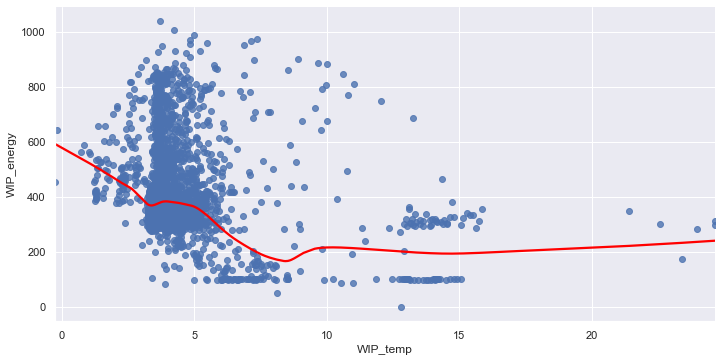

In [17]:
sns.lmplot(x="WIP_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

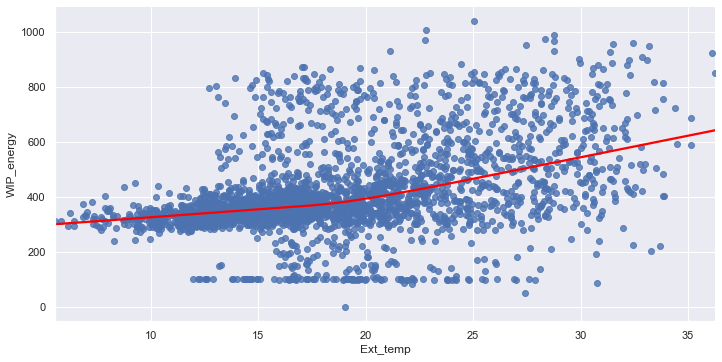

In [16]:
sns.lmplot(x="Ext_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

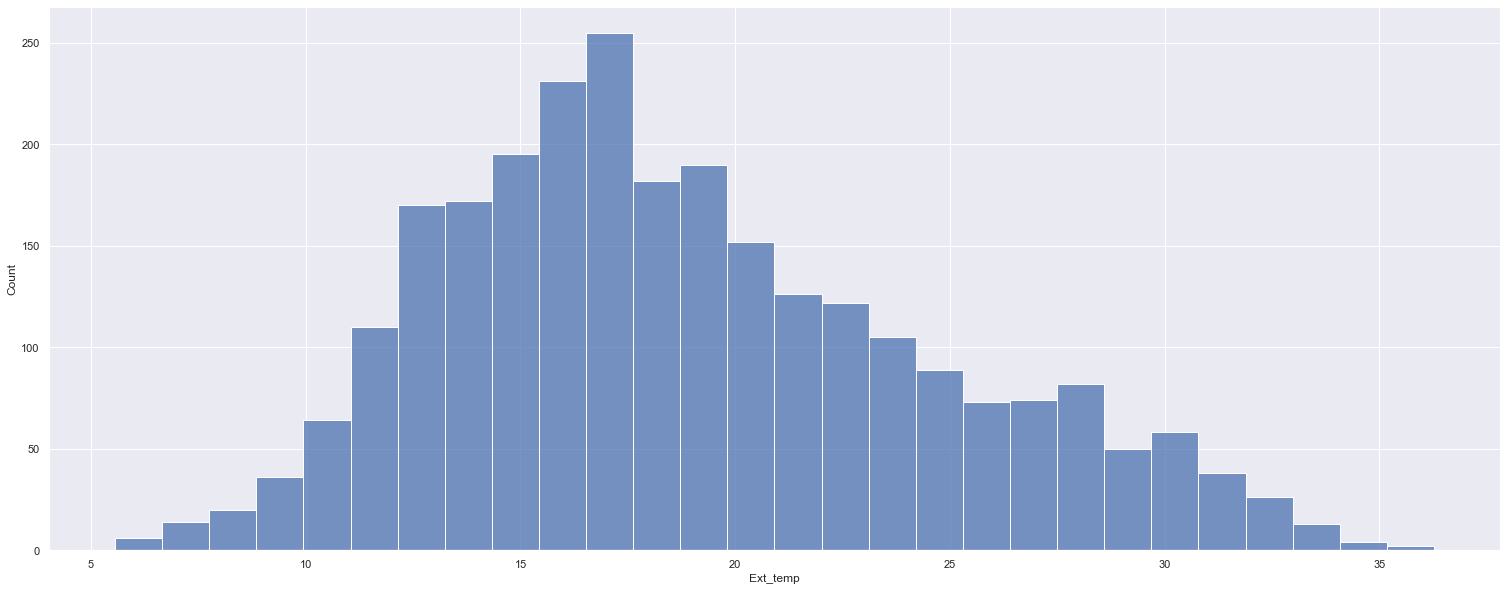

In [19]:
sns.histplot(data=dfe, x="Ext_temp");

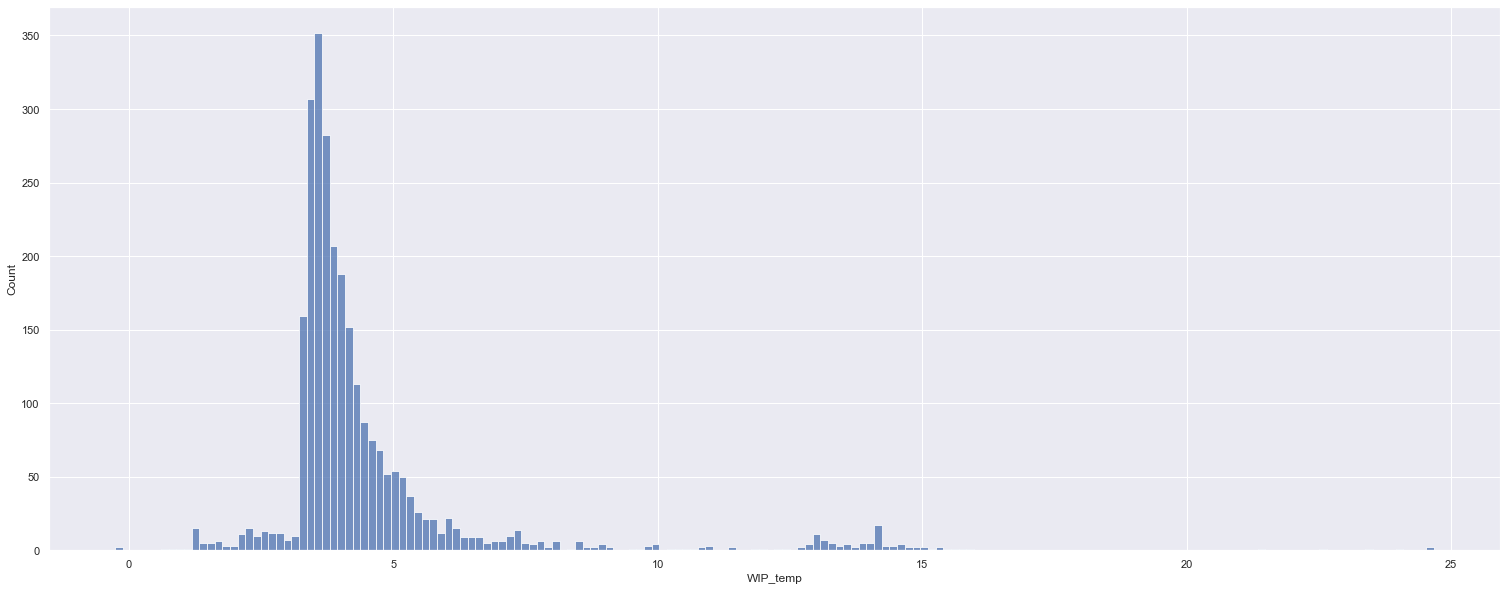

In [20]:
sns.histplot(data=dfe, x="WIP_temp");

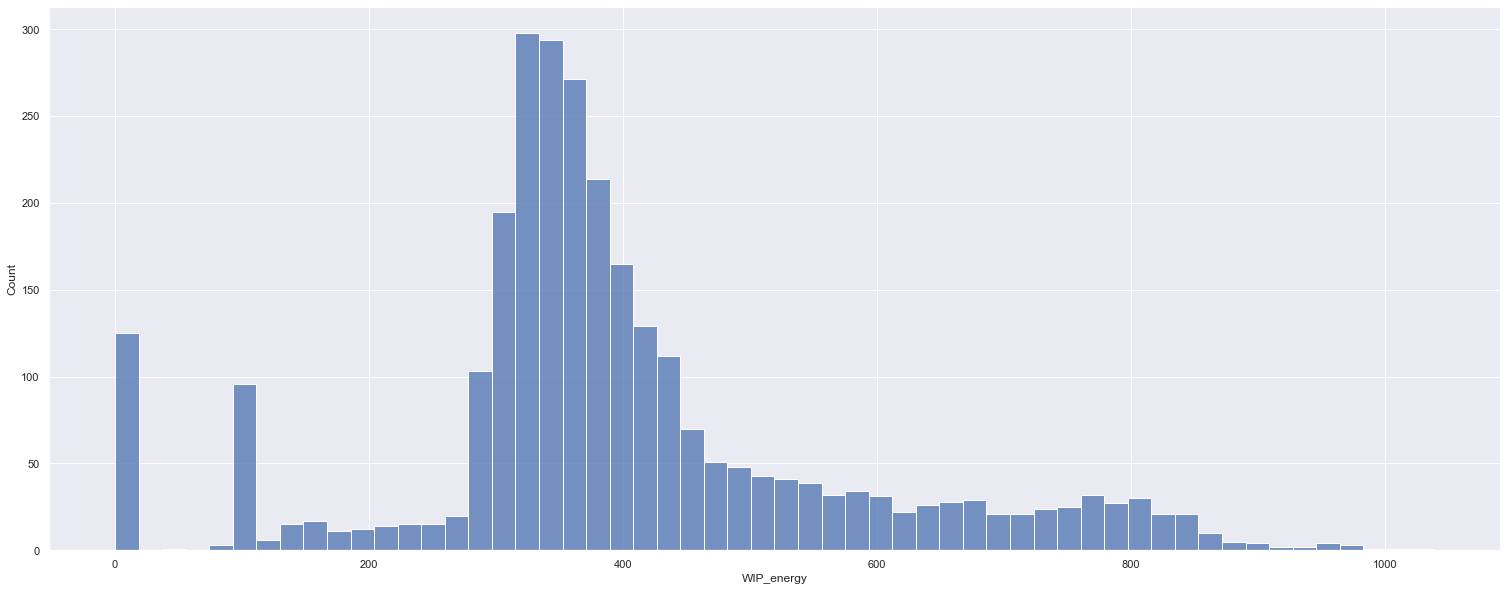

In [21]:
sns.histplot(data=dfe, x="WIP_energy");

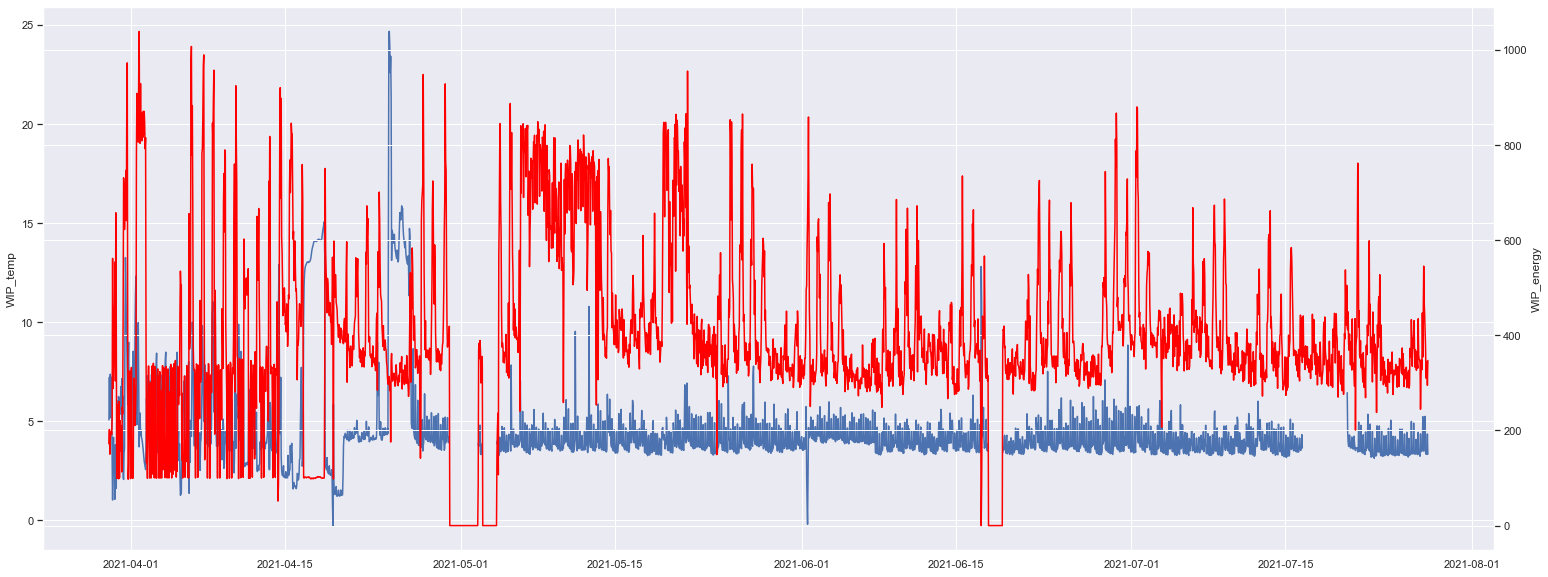

In [27]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dfe.index, dfe.WIP_temp)
ax2.plot(dfe.index, dfe.WIP_energy, color="red")

# ax1.set_xlabel('X data')
ax1.set_ylabel("WIP_temp")
ax2.set_ylabel("WIP_energy")

plt.show()

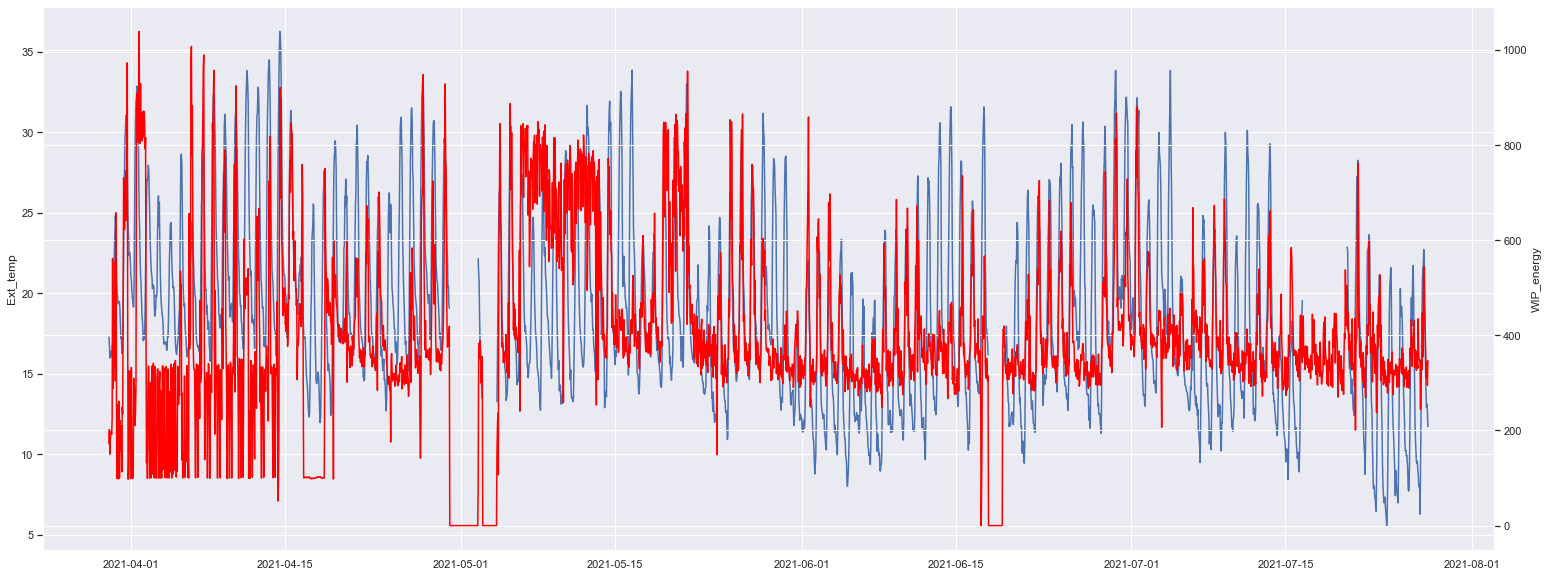

In [28]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dfe.index, dfe.Ext_temp)
ax2.plot(dfe.index, dfe.WIP_energy, color="red")

# ax1.set_xlabel('X data')
ax1.set_ylabel("Ext_temp")
ax2.set_ylabel("WIP_energy")

plt.show()